# Import libraries

In [1]:
from load_data import *
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

the library load_data.py contains the main function load_data(...) that loads the jets from FastJet to numpy arrays

# Exploring FastJet-JUNIPR output format

The output file from the fastjetcode "jets_to_JUNIPR.cc" looks like this:

In [2]:
!head input_data/JUNIPR_format_jets.dat

J 0
O 0 0 488.405 493.865
E 7
M 0 0 1 0 0 0 1 
B 0.00363022 1.79256 4.37756 0.00304927 0.0166079 0.550764 3.82792 0.00876003 0.237378 0.258904 1.7143 0.0797107 0.106041 0.220513 4.64348 0.0259632 0.017117 0.212303 2.88331 0.00366474 0.073882 0.109016 4.03159 0.0086754 0.0494688 0.109734 2.82961 0.00570179 
D 492.072 0.00304927 1.23597 57.1407 1.79284 1.79256 4.37756 0.938271 483.9 0.0114722 0.826209 44.0755 8.17229 0.548165 3.82608 1.31315 6.23237 0.604282 3.93012 0.440647 1.93992 0.416226 3.33764 0.157604 432.587 0.0356127 1.30354 22.4732 51.313 0.211726 4.68308 2.03015 425.182 0.0358608 1.20116 18.4099 7.40458 0.214645 2.7267 0.496592 393.769 0.0442214 1.14298 11.5195 31.4133 0.0755135 3.90124 1.35171 48.7746 0.213405 4.70891 1.52673 2.53839 0.208769 4.15149 0.0331925 
P 493.865 0 0 73.2342 492.072 0.00304927 1.23597 57.1407 8.17229 0.548165 3.82608 1.31315 483.9 0.0114722 0.826209 44.0755 432.587 0.0356127 1.30354 22.4732 425.182 0.0358608 1.20116 18.4099 51.313 0.211726 4.68308 2.0

"J 0" means this is jet number zero

"O 0 0 488.405 493.865" gives the momentum of total jet and is oriented to point in the z-direction. In format (px, py, pz, E)

"E 7" means that the shower ended at timestep t = 7 (starting at t=0)

"B ..." gives the brancing for each timestep. There are 4*(number of branchings) numbers, and each set of 4 numbers correspond to (z, theta, phi, delta)

"D ..." gives the daughters at each timestep. There are 8*(number of branchings) numbers, and each set of 8 numbers correspond to the four momentum of the two daughters. Each four momentum is given in coordinates (E, theta, phi, mass). The most energetic daughter is listed first

"P ..." gives the mother momentum at each timestep. There are 4*(number of branchings) numbers, and each set of 4 numbers correspond to Each four momentum is given in coordinates (E, theta, phi, mass) for the mother


# Load data

In [4]:
data_path   = 'input_data/JUNIPR_format_jets.dat'
n_events    = 20000
batch_size  = 10
granularity = 10
all_data = load_data(data_path, n_events, batch_size, granularity, reload = False)
[seed_momentum, daughters, mother_momenta, endings, ending_weights, mothers, mother_weights, sparse_branchings, sparse_branching_weights] = all_data

Getting pickled data from ./input_data/pickled/JUNIPR_format_jets_N20000_D4_BS10_G10.pickled


# Exploring output format from load_data

The first index for each entry in all_data is the batch_number, then the next index indicates the jet in the batch

In [5]:
batch_i = 0
jet_i   = 0

## Seed Momentum

Each seed momentum is one feature scaled momentum of the format (E, theta, phi, mass) [or (E, theta, phi) if dim_mom == 3 ]

In [6]:
seed_momentum[batch_i][jet_i]

array([ 0.99801341, -1.10421842,  0.        ,  0.69089755])

## Daughters

First entry of list of daughters is padded with zeros since at t=0 there is only the seed particle and no daughters. 

Daughter momenta has been feature scaled to be approximately in the range [0,1]

All jets in same batch has been padded to be the same length. Daughters are padded with value -1. 

In [7]:
daughters[batch_i][jet_i]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.9974281 ,  0.3037583 ,  0.19671074,  0.6509689 ,  0.09394011,
         1.0147246 ,  0.6967103 , -0.01025269],
       [ 0.9947334 ,  0.4514958 ,  0.13149525,  0.60919434,  0.33803406,
         0.88261926,  0.6089395 ,  0.04383685],
       [ 0.29442832,  0.8934864 ,  0.625498  , -0.13186853,  0.10662728,
         0.8519185 ,  0.5312019 , -0.29731074],
       [ 0.9766961 ,  0.57779795,  0.20746483,  0.5008077 ,  0.6336593 ,
         0.7765531 ,  0.74533534,  0.11394277],
       [ 0.9739178 ,  0.57857203,  0.19117056,  0.46871638,  0.3221601 ,
         0.7780798 ,  0.43396777, -0.11263566],
       [ 0.9615674 ,  0.60193795,  0.18191092,  0.3932736 ,  0.5546981 ,
         0.6616008 ,  0.62090164,  0.04849388],
       [ 0.62549555,  0.7774338 ,  0.74944633,  0.06808607,  0.14989361,
         0.77498496,  0.6607302 , -0.547972  ],
       [-1.        , -1.        

## Mother momenta

Mother momenta has been feature scaled to be approximately in the range [0,1]

All jets in same batch has been padded to be the same length. Mothers are padded with value -1. 

In [8]:
mother_momenta[batch_i][jet_i]

array([[ 0.9980134 , -1.1042184 ,  0.        ,  0.69089836],
       [ 0.9974281 ,  0.3037583 ,  0.19671074,  0.6509689 ],
       [ 0.33803406,  0.88261926,  0.6089395 ,  0.04383685],
       [ 0.9947334 ,  0.4514958 ,  0.13149525,  0.60919434],
       [ 0.9766961 ,  0.57779795,  0.20746483,  0.5008077 ],
       [ 0.9739178 ,  0.57857203,  0.19117056,  0.46871638],
       [ 0.6336593 ,  0.7765531 ,  0.74533534,  0.11394277],
       [-1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ]],
      dtype=float32)

## Endings & Ending_weights

Endings is a list of booleans. It is false if the jet did not end, and true if it ended. 

Endings has been padded with False to get same length as the rest of the batch. 

Ending_weights is a corresponding list with True for real values and False for padded values in endings. 

In [9]:
endings[batch_i][jet_i]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [10]:
ending_weights[batch_i][jet_i]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False]])

## Mothers and Mother_weights

Mothers is a matrix with dimension (timestep, dim_mother_out). dim_mother_out is default set to 100. 

At timestep t, there are (t+1) available candidate mothers (starting at t=0 for the seed particle).

The index in the dim_mother_out axis corresponds to the index of the candidate mother in an energy ordered list.

E.g. (for batch_i=0, jet_i=0):

At t=0 there is only one particle avaiable, so mothers[batch_i][jet_i][t=0][0]=True

At t=1 the most energetic candidate mother branched so mothers[batch_i][jet_i][t=1][0]=True

At t=2 the second most energetic candidate mother branched so mothers[batch_i][jet_i][t=1][1]=True

... And so on.

Mother_weights has the same shape as mothers, and its entries is True for all mother candidates for each time step. 

Mothers and Mohter_weights has been padded with False to match the length of the rest of the batch

In [11]:
mothers[batch_i][jet_i]

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
mother_weights[batch_i][jet_i]

array([[ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Sparse_branchings and sparse_branching_weigths

Sparse_branchings gives the index to a cell in the granularity^4 space of possible branchings for each timestep. By default granularity=10. 

Sparse_branchings is padded with the value granularity^4. Since arrays start counting at 0, the branching index i is in the range [0,granularity^4-1] and i=granularity^4 is unphysical (hence why it is used as a pad_value).  

Sparse_branching_weights is True for real data and False for padded values. 

In [13]:
sparse_branchings[batch_i][jet_i]

array([[ 1963],
       [ 3664],
       [ 8427],
       [ 7475],
       [ 3443],
       [ 6264],
       [ 5244],
       [10000],
       [10000],
       [10000],
       [10000],
       [10000],
       [10000]], dtype=int32)

In [14]:
sparse_branching_weights[batch_i][jet_i]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

# Plot distributions

In [13]:
from JUNIPR import *
from plotting_utilities import *

In [14]:
junipr = JUNIPR()

In [15]:
Pythia_outputs = junipr.validate(all_data, predict = False)

# Endings

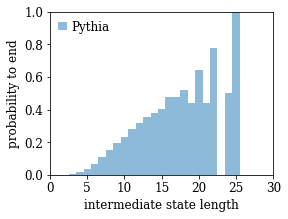

In [16]:
e_settings = {'alpha':0.5, 'width':1}
plt.bar(*p_end(Pythia_outputs[0], Pythia_outputs[1]), label = "Pythia", **e_settings)
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.axis([0, 30, 0, 1])
plt.xlabel('intermediate state length')
plt.ylabel('probability to end')
plt.legend()
plt.show()

# Mothers

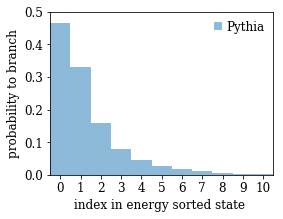

In [23]:
m_settings = {'alpha':0.5, 'width':1}
t = None
plt.bar(*p_mother(Pythia_outputs[2], Pythia_outputs[3], t=t), label="Pythia", **m_settings)
plt.xticks(np.arange(0, 11, 1))
plt.axis([-0.5, 10.5, 0, 0.5])
plt.xlabel('index in energy sorted state ' + t_label(t))
plt.ylabel('probability to branch')
plt.legend()
plt.show()

# Branchings

In [18]:
b_settings = {'alpha':0.5, 'align':'edge'}

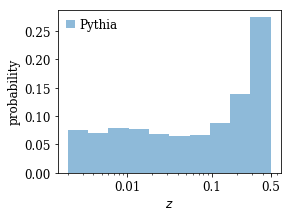

In [19]:
t = None
plt.bar(*p_z(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
plt.xscale('log')
plt.xlabel('$z$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.01, 0.1, 0.5], [0.01, 0.1, 0.5])
plt.legend()
plt.show()

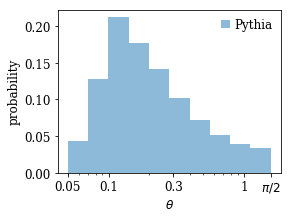

In [20]:
t = None
plt.bar(*p_theta(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
#plt.bar(*p_theta(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xscale('log')
plt.xlabel('$\\theta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.05, 0.1, 0.3, 1, np.pi/2], [0.05, 0.1, 0.3, 1, '$\pi/2$'])
plt.legend()
plt.show()

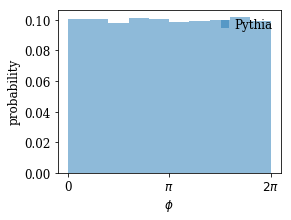

In [21]:
t = None
plt.bar(*p_phi(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
#plt.bar(*p_phi(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xlabel('$\\phi$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0, np.pi, 2* np.pi], [0,'$\pi$', '$2\pi$'])
plt.legend()
plt.show()

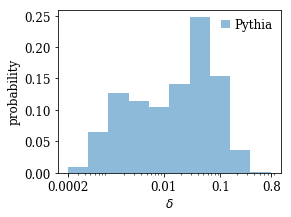

In [22]:
t = None
plt.bar(*p_delta(Pythia_outputs[4], Pythia_outputs[5], granularity=granularity, t=t), label = 'Pythia', **b_settings)
#plt.bar(*p_delta(JUNIPR_outputs[4], JUNIPR_outputs[5], granularity=granularity, t=t), label = 'JUNIPR', **b_settings)
plt.xscale('log')
plt.xlabel('$\\delta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([2e-4, 0.01, 0.1, 0.8], [2e-4, 0.01, 0.1, 0.8])
plt.legend()
plt.show()